In [210]:
import pandas as pd
from functools import reduce
import numpy as np

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier

In [211]:
feature_dir = 'data/features/'

In [212]:
def run_experiment(model, X, y):
    scores = []
    kf = KFold(n_splits=5)
    for train_index, test_index in kf.split(X):
        X_train, X_test, y_train, y_test = X.loc[train_index],X.loc[test_index], y.loc[train_index], y.loc[test_index]
        X_train.fillna(X_train.mean(), inplace=True)
        model.fit(X_train, y_train)
        scores.append(model.score(X_test, y_test))
    print('Scores',scores)
    print('Average score', sum(scores)/len(scores))

In [213]:
df_twitter = pd.read_csv(feature_dir+'twitter_features.csv')
df_news = pd.read_csv(feature_dir+'news_features.csv')
df_out= pd.read_csv(feature_dir+'index_features.csv')

In [214]:
clf = SVC(C=1.0)
clf2 = SVR(C=1.0)

In [215]:
df_y = df_out
df_X = pd.merge(df_twitter, df_news, on='Date', how='outer')

In [216]:
df_y

,Date,Change VIX,Lag 2 Change VIX,Lag 2 Significant VIX,Change SPY,Lag 2 Change SPY,Lag 2 Significant SPY
0,2015-01-02,0.116279,0.144707,1,-0.007741,-0.020787,-1
1,2015-01-05,0.080518,0.050026,1,-0.010708,-0.013469,-1
2,2015-01-06,0.059406,-0.118052,-1,-0.010188,0.009501,0
3,2015-01-07,-0.008854,-0.184119,-1,-0.003315,0.024724,1
4,2015-01-08,-0.110174,0.005020,0,0.012859,0.001961,0
...,...,...,...,...,...,...,...
1083,2019-04-24,-0.010269,0.072626,1,0.007259,-0.002357,0
1084,2019-04-25,0.060654,-0.018811,-1,-0.002288,0.004758,0
1085,2019-04-26,0.011287,-0.024554,-1,-0.000068,0.004759,0
1086,2019-04-29,-0.029762,-0.013804,-1,0.004827,0.004123,0


In [217]:
df_X

,Date,BarackObama_sentiment_score,BarackObama_heuristic_score,cnnbrk_sentiment_score,cnnbrk_heuristic_score,KimKardashian_sentiment_score,KimKardashian_heuristic_score,Trump_sentiment_score,Trump_heuristic_score,New York Times_sentiment_score,CNN_sentiment_score,Washington Post_sentiment_score,NYT_sentiment_score
0,2015-01-02,-0.4289,-3.145348,NaN,NaN,NaN,NaN,31.0612,106.794357,NaN,-6.3481,NaN,-8.5101
1,2015-01-05,1.2205,9.206268,NaN,NaN,NaN,NaN,49.6462,177.616544,NaN,-1.4093,NaN,9.4768
2,2015-01-06,0.6436,7.880455,NaN,NaN,4.0653,37.652221,37.9385,114.107390,NaN,1.0081,NaN,-5.3850
3,2015-01-07,5.6336,40.112804,NaN,NaN,0.9154,8.877281,3.2739,2.292712,NaN,-0.9171,NaN,-23.5856
4,2015-01-08,1.1121,9.476567,NaN,NaN,1.7150,16.294419,4.9556,12.653774,NaN,-2.5206,NaN,-9.8248
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1083,2019-04-24,NaN,NaN,NaN,NaN,NaN,NaN,4.2964,47.781231,NaN,NaN,NaN,-9.0002
1084,2019-04-25,NaN,NaN,NaN,NaN,NaN,NaN,-4.5359,NaN,NaN,NaN,NaN,-11.8098
1085,2019-04-26,NaN,NaN,NaN,NaN,NaN,NaN,5.7630,NaN,NaN,NaN,NaN,-30.7923
1086,2019-04-29,NaN,NaN,NaN,NaN,NaN,NaN,3.9038,-inf,NaN,NaN,NaN,-36.7499


In [236]:
df_X.columns

Index(['Date', 'BarackObama_sentiment_score', 'BarackObama_heuristic_score',
       'cnnbrk_sentiment_score', 'cnnbrk_heuristic_score',
       'KimKardashian_sentiment_score', 'KimKardashian_heuristic_score',
       'Trump_sentiment_score', 'Trump_heuristic_score',
       'New York Times_sentiment_score', 'CNN_sentiment_score',
       'Washington Post_sentiment_score', 'NYT_sentiment_score'],
      dtype='object')

In [246]:
X = df_X.reset_index(drop=True)[['NYT_sentiment_score', 'Trump_sentiment_score']]
y = df_y.reset_index(drop=True)
# X = X.drop(columns=['Date'])
X.fillna(0, inplace=True)
y = y['Lag 2 Significant VIX']
# y.fillna(y.mean(), inplace=True)

In [247]:
np.isinf(X).all()

NYT_sentiment_score      False
Trump_sentiment_score    False
dtype: bool

In [248]:
X

,NYT_sentiment_score,Trump_sentiment_score
0,-8.5101,31.0612
1,9.4768,49.6462
2,-5.3850,37.9385
3,-23.5856,3.2739
4,-9.8248,4.9556
...,...,...
1083,-9.0002,4.2964
1084,-11.8098,-4.5359
1085,-30.7923,5.7630
1086,-36.7499,3.9038


In [249]:
y

0       1
1       1
2      -1
3      -1
4       0
       ..
1083    1
1084   -1
1085   -1
1086   -1
1087    1
Name: Lag 2 Significant VIX, Length: 1088, dtype: int64

In [250]:
y.value_counts()

-1    526
 1    455
 0    107
Name: Lag 2 Significant VIX, dtype: int64

In [251]:
# Guessing Most common class always
succ = y.value_counts().max()/(y.count())

In [252]:
succ

0.4834558823529412

In [253]:
np.where(np.isnan(X))

(array([], dtype=int64), array([], dtype=int64))

In [254]:
run_experiment(clf, X, y)

Scores [0.48623853211009177, 0.463302752293578, 0.43119266055045874, 0.48847926267281105, 0.4700460829493088]
Average score 0.46785185811524965


In [260]:
def rfc_param_selection(X, y):
    n_estims= [200, 700]
    max_feats= ['auto', 'sqrt', 'log2']
    param_grid = {'n_estimators': n_estims, 'max_features' : max_feats}
    grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_

In [256]:
def svc_param_selection(X, y):
    kernels = ['rbf','linear']
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas, 'kernel':kernels}
    grid_search = GridSearchCV(SVC(), param_grid, cv=5, verbose=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_

In [257]:
def MLP_param_selection(X, y):
    solvers = ['lbfgs', 'sgd']
    max_iters = [1000,1500,2000 ]
    alphas = [10,100,1000,10000]
    hidden_layer_sizes = [10,12,15]
    random_states = [i for i in range(10)]
    param_grid = {'solver': solvers, 'max_iter': max_iters, 'alpha': alphas, 'hidden_layer_sizes':hidden_layer_sizes, 'random_state':random_states}
    

    grid_search = GridSearchCV(MLPClassifier(), param_grid, cv=5, verbose=5)
    grid_search.fit(X, y)
    grid_search.best_params_
    print(grid_search.best_estimator_)
    print(grid_search.best_score_)
    return grid_search.best_params_


In [258]:
svc_param_selection(X,y)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.486, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=rbf ................................
[CV] .... C=0.001, gamma=0.001, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001, gamma=0.001, kernel=linear, score=0.486, total=   0.0s
[CV] C=0.001, gamma=0.001, kernel=linear .............................
[CV] . C=0.001,

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s


[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.486, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=rbf .................................
[CV] ..... C=0.001, gamma=0.01, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.486, total=   0.0s
[CV] C=0.001, gamma=0.01, kernel=linear ..............................
[CV] .. C=0.001, gamma=0.01, kernel=linear, score=0.482, total=   0.0s
[CV] C

[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.484, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=linear ................................
[CV] .... C=0.01, gamma=0.1, kernel=linear, score=0.484, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.486, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.482, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.484, total=   0.0s
[CV] C=0.01, gamma=1, kernel=linear ..................................
[CV] .

[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.482, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.482, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.484, total=   0.1s
[CV] C=1, gamma=0.001, kernel=linear .................................
[CV] ..... C=1, gamma=0.001, kernel=linear, score=0.484, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.482, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.505, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.454, total=   0.0s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.486, total=  45.2s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.482, total=  46.9s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.482, total=  36.5s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.484, total=  32.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.484, total=  24.2s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.422, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.399, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] .

[Parallel(n_jobs=1)]: Done 200 out of 200 | elapsed: 12.7min finished


{'C': 0.001, 'gamma': 0.001, 'kernel': 'rbf'}

In [259]:
rfc_param_selection(X,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:   24.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.4311081046801674


{'max_features': 'log2', 'n_estimators': 200}

In [261]:
model = RandomForestClassifier(max_features='log2',n_estimators=200)
run_experiment(model, X, y)

Scores [0.40825688073394495, 0.43119266055045874, 0.43119266055045874, 0.4009216589861751, 0.4377880184331797]
Average score 0.4218703758508434


In [61]:
model = SVC(C=1, gamma=.1, kernel='rbf')
run_experiment(model, X, y)

Scores [0.504950495049505, 0.504950495049505, 0.4752475247524752, 0.4752475247524752, 0.47]
Average score 0.486079207920792


In [262]:
MLP_param_selection(X,y)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.491, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.463, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.450, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.470, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.1s remaining:    0.0s


[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.502, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.486, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.477, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.468, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd, score=0.484, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.463, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.500, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, m

[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.495, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.459, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.470, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.470, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=sgd, score=0.486, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.452, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.477, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.477, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.468, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.472, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.488, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs, score=0.495, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs, score=0.477, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, m

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.482, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.477, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.436, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.488, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.488, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.488, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.477, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.472, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd, score=0.493, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=10, max_iter=

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.472, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.509, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.482, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.475, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs, score=0.461, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.477, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.491, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd, score=0.459, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.477, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.454, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.456, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.472, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.491, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.445, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.470, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.447, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.475, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.461, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.477, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.491, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.459, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.477, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.454, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.456, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.488, total=   1.0s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs, score=0.495, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_i

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.488, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.482, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.486, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.427, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.479, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=10, hidden_layer_siz

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.427, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.475, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.438, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.486, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.482, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, m

[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.486, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.482, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.477, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.475, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.484, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=12, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.452, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.505, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.477, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.472, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.488, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.495, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.486, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.422, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.470, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.452, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.477, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd, score=0.482, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, m

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.472, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.482, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.413, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.475, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=lbfgs, score=0.452, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.482, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.482, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.413, total=   0.1s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.484, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.488, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.484, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 


/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs, score=0.438, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.491, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.482, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.472, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.493, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.472, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.488, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.509, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.482, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, m

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.454, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.427, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.484, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.438, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

/Users/burstein/anaconda3/lib/python3.6/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=lbfgs, score=0.447, total=   0.9s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.491, total=   0.7s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.482, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.472, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd, score=0.493, total=   0.8s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.472, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.488, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=sgd, score=0.484, total=   0.6s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs, score=0.509, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs, score=0.482, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, m

[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.495, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.454, total=   0.3s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.427, total=   0.2s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.484, total=   0.4s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=lbfgs, score=0.438, total=   0.5s
[CV] alpha=10, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=10, hidden_layer_siz

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=lbfgs, score=0.488, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=lbfgs, score=0.488, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=0, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.491, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs, score=0.482, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=sgd, score=0.482, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.482, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=1500, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=3, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs, score=0.491, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs, score=0.477, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=lbfgs, score=0.488, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=10, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=2, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=6, solver=sgd, score=0.488, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.486, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.477, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd, score=0.482, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=5, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=1500, random_state=9, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.491, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd, score=0.482, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=12

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=2, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs, score=0.482, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.486, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.482, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.482, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.484, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=1, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.491, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.484, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=lbfgs, score=0.484, total=   0.2s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.486, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd, score=0.482, total=   0.5s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=100, hidden_layer_

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=4, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15

[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=8, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.495, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.482, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs, score=0.477, total=   0.1s
[CV] alpha=100, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=lbfgs 
[CV]  alpha=100, hidden_la

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=3, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=6, solver=sgd, score=0.484, total=   0.5s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=0, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=4, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=10, max_iter=2000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=3, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.484, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=2, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=0, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd, score=0.486, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=12, max_iter=2000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=2, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=1000, hi

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=lbfgs 
[CV]  alpha=

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd, score=0.482, total=   0.4s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=1000, hidden_lay

[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=5, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=1000, hidde

[CV]  alpha=1000, hidden_layer_sizes=15, max_iter=2000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=0, solver=lbfgs 
[CV

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=2, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=3, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=5, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=10, max_iter=2000, random_state=6, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.486, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=0, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=8, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1000, random_state=9, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.486, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=1, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=2, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=12, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=0, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=1, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=4, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=5, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.486, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1000, random_state=9, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=0, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=3, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=4, solver=lbfgs 
[CV]  alph

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=7, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs, score=0.484, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=1500, random_state=8, solver=lbfgs 
[C

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.486, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.482, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=2, solver=sgd, score=0.484, total=   0.2s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=3, solver=lbfgs 
[CV]  alpha=10000,

[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=sgd, score=0.482, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=sgd 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=6, solver=sgd, score=0.484, total=   0.3s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.486, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs, score=0.482, total=   0.0s
[CV] alpha=10000, hidden_layer_sizes=15, max_iter=2000, random_state=7, solver=lbfgs 
[CV]  alph

[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed: 15.5min finished


MLPClassifier(activation='relu', alpha=10, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=10, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1000,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1, shuffle=True, solver='sgd',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)
0.4880649389083837


{'alpha': 10,
 'hidden_layer_sizes': 10,
 'max_iter': 1000,
 'random_state': 1,
 'solver': 'sgd'}

In [62]:
model = MLPClassifier(solver='lbfgs', alpha=10, max_iter=1500, hidden_layer_sizes=10)
run_experiment(model, X, y)

Scores [0.45544554455445546, 0.45544554455445546, 0.4158415841584158, 0.44554455445544555, 0.46]
Average score 0.4464554455445545


In [1]:
print(3)

3


In [34]:
from statsmodels.graphics.tsaplots import plot_acf

In [48]:
auto_y = df_out['Change SPY']

In [49]:
auto_y

0     -0.007741
1     -0.010708
2     -0.010188
3     -0.003315
4      0.012859
         ...   
499   -0.000754
500    0.002617
501    0.002433
502   -0.009225
503    0.001114
Name: Change SPY, Length: 504, dtype: float64

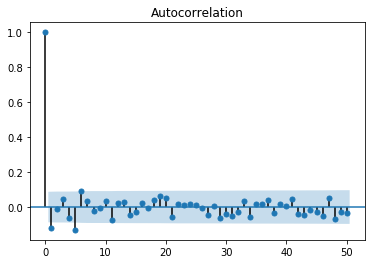

In [50]:
plot_acf(auto_y, lags = 50)